In [1]:
import powerlaw
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.io import loadmat,savemat
import h5py


In [2]:
dataloc = '/Users/chorvat/Dropbox (Brown)/Research Projects/Active/Data/Vanuatu-TC-Blooms/stormmap_rad.mat';
data_storm = loadmat(dataloc)

hoverfac = data_storm['hoverfactor'][()].T


In [3]:
hoverfac = hoverfac[np.isfinite(hoverfac)]
hoverfac = hoverfac[hoverfac > 1.7]

In [4]:
fit = powerlaw.Fit(hoverfac)

Calculating best minimal value for power law fit
/Users/chorvat/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/chorvat/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Text(0, 0.5, 'p(X),  p(X≥x)')

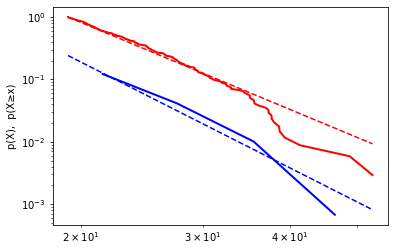

In [5]:
####
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
####
figCCDF.set_ylabel(u"p(X),  p(X≥x)")

/Users/chorvat/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


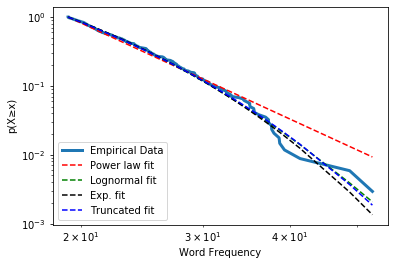

In [6]:
fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
fit.exponential.plot_ccdf(ax=fig, color='k', linestyle='--', label='Exp. fit')
fit.truncated_power_law.plot_ccdf(ax=fig, color='b', linestyle='--', label='Truncated fit')
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Word Frequency")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

figname = 'FigLognormal'


In [7]:
r,p = fit.distribution_compare('power_law', 'lognormal')
print(r,p)

r,p = fit.distribution_compare('lognormal','power_law')
print(r,p)

r,p = fit.distribution_compare('power_law', 'exponential')
print(r,p)

r,p = fit.distribution_compare('lognormal', 'exponential')
print(r,p)

r,p = fit.distribution_compare('exponential', 'truncated_power_law')
print(r,p)

r,p = fit.distribution_compare('exponential', 'stretched_exponential')
print(r,p)

r,p = fit.distribution_compare('lognormal_positive', 'stretched_exponential')
print(r,p)


-4.430241806334958 0.06780977180341409
4.430241806334958 0.06780977180341409
-4.6919542708727375 0.07935827965826305
-0.26171246453778463 0.45127702202284337
0.009230580581699677 0.984120701559743


Assuming nested distributions


-0.012369752290759983 0.8750179031185452
-0.2740822168285446 0.26815005715919604


In [8]:
fit.supported_distributions

{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

In [9]:
fit.exponential.parameter1_name
fit.exponential.parameter1

0.19726781300563445

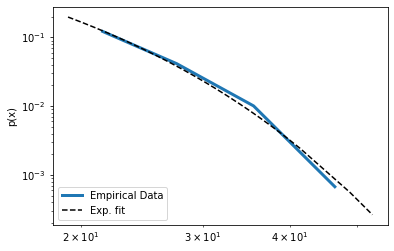

In [10]:
fig2 = fit.plot_pdf(linewidth=3, label='Empirical Data')
fit.exponential.plot_pdf(ax=fig2, color='k', linestyle='--', label='Exp. fit')
fig2.set_ylabel(u"p(x)")
handles, labels = fig2.get_legend_handles_labels()
fig2.legend(handles, labels, loc=3)

In [11]:
fit.exponential.fit()

In [12]:
fit.exponential.parameter1

0.19726781300563445

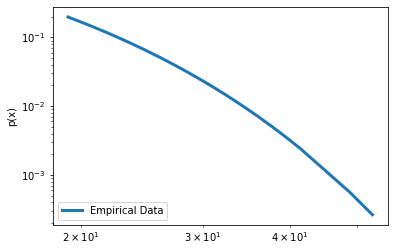

In [13]:
fig3 = fit.exponential.plot_pdf(linewidth=3, label='Empirical Data')
fig3.set_ylabel(u"p(x)")
handles, labels = fig3.get_legend_handles_labels()
fig3.legend(handles, labels, loc=3)

In [14]:
fit.exponential.xmin

19.16730153800181

In [15]:
fit.exponential.parameter1

0.19726781300563445